In [1]:
from skimage import data, segmentation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2

import os
import skimage.io as sio
import tqdm
import datetime

In [2]:
img = data.coffee()
img = cv2.resize(img, (300, 200))
# labels = segmentation.slic(img, n_segments=100, start_label=1)#, compactness=10, n_segments=100, start_label=1)
labels = segmentation.slic(img, compactness=30, n_segments=100, start_label=1)
# labels = segmentation.watershed(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
# labels = segmentation.felzenszwalb(img, scale=400)

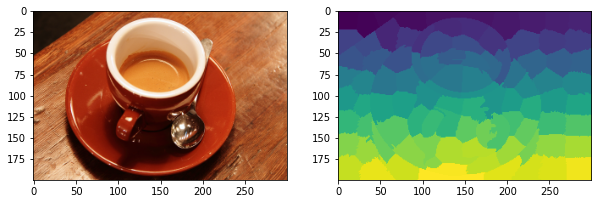

In [3]:
plt.figure(0, figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(labels)

plt.show()

In [8]:
from src.rag import RAG
from src.utils import visualize_rag

In [9]:
from src.sprt import compute_averageColor, compute_conditionalProbability, compute_averageColor, sample_from_region, sprt_test

In [10]:
from src.region_merging import RegionMerging

# Start Region Merging

In [14]:
drm = RegionMerging(img, lambda1=0.9, lambda2=0.1)

0:00:00.619359


In [12]:
start = datetime.datetime.now()
initial_labels = drm.get_labels()
print(len(drm.graph.nodes))

drm.run_region_merging(14)

new_labels = drm.get_labels()
print(len(drm.graph.nodes))
print(datetime.datetime.now() - start)

93
15
0:00:11.305026


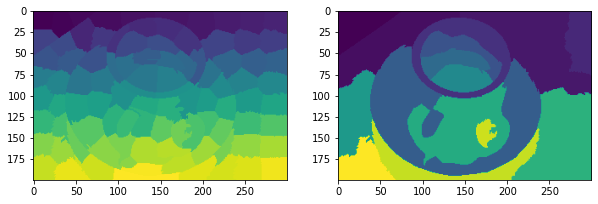

In [13]:
plt.figure(0, figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(initial_labels)

plt.subplot(1, 2, 2)
plt.imshow(new_labels)

plt.show()

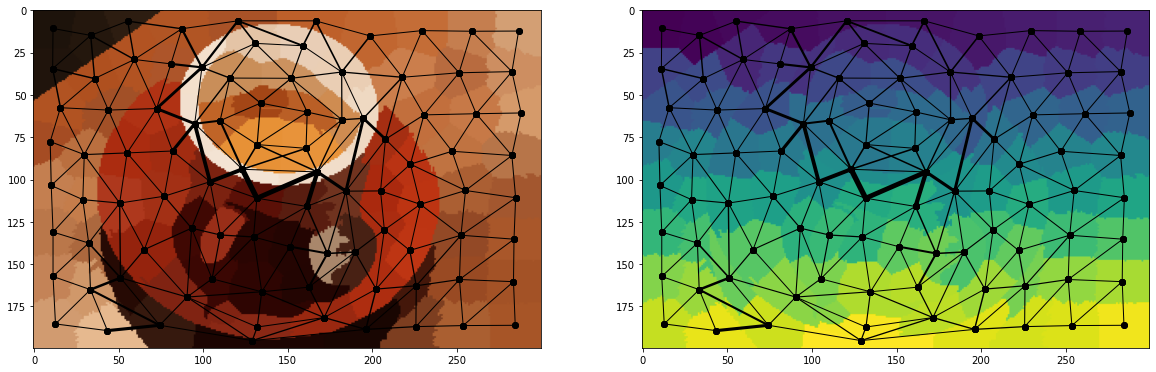

In [15]:
visualize_rag(drm.get_quant_image(), new_labels, drm.graph)